# NFL Playoff Predictions

Months away from the 2019 NFL season, we take a look back on past NFL team season statistics to build a model to predict if a team is playoff bound or not. 

Machine learning models require much more than individual player and team statistics to determine the outcome of a game, let alone the course of a teams season that is filled with uncertainty to the untrained fan. Nevertheless, as a naive logician, we can attempt to use the odds in our favor and build a machine learner that can provide us an edge and advance the NFL competitiveness.

In this post we explore different tools and methods that can be used to try to utilize NFL team statistics from 2009-2017 to predect which team will make the playoffs. The first section on this post we perform various Data wranggling and formatting, data analysis, then we go into selecting the best features for prediction and finally we build a basic model to choose the right right team given a particular set of offensive and defensive seasonal data to predict whether a team makes the playoffs. 

![Usa Nfl Map Collage 5](https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/usa-nfl-map-collage-5-mb-art-factory.jpg "Usa Nfl Map Collage 5 is a painting by Bekim Art which was uploaded on October 8th, 201")

### Data Inport

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical cmputation library

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
# sns.set(font_scale = 2)

In [2]:
pass_o = pd.read_csv('./season_team_stats/team_season_passing_df.csv') # Pass Offense
pass_d = pd.read_csv('./season_team_stats/team_def_season_passing_df.csv') # Pass Defense
run_o = pd.read_csv('./season_team_stats/team_season_rushing_df.csv') # run offense
run_d = pd.read_csv('./season_team_stats/team_def_season_rushing_df.csv')

playoff_pass = pd.read_csv('playoff_game_passing_df.csv') # Used to identify playoff teams

### Data Cleaning and Formatting

In [3]:
pass_o.head()

,Season,Team,Player_Name,Attempts,Completions,Drives,Comp_Perc,Total_Yards,Total_Raw_AirYards,Total_Comp_AirYards,Yards_per_Att,Yards_per_Comp,Yards_per_Drive,Raw_AirYards_per_Att,Comp_AirYards_per_Att,Raw_AirYards_per_Comp,Comp_AirYards_per_Comp,Raw_AirYards_per_Drive,Comp_AirYards_per_Drive,PACR,TimesHit,TimesHit_per_Drive,Interceptions,TDs,Air_TDs,aPACR,Air_TD_Rate,TD_to_Int,Total_EPA,Success_Rate,EPA_per_Att,EPA_per_Comp,EPA_Comp_Perc,TD_per_Att,Air_TD_per_Att,Int_per_Att,TD_per_Comp,Air_TD_per_Comp,TD_per_Drive,Air_TD_per_Drive,Int_per_Drive,EPA_per_Drive,Total_WPA,Win_Success_Rate,WPA_per_Att,WPA_per_Comp,WPA_Comp_Perc,WPA_per_Drive,Total_Clutch_EPA,Clutch_EPA_per_Att,Clutch_EPA_per_Drive,airEPA_Comp,airEPA_Incomp,Total_Raw_airEPA,Raw_airEPA_per_Att,Raw_airEPA_per_Drive,epa_PACR,airEPA_per_Att,airEPA_per_Comp,airEPA_per_Drive,air_Success_Rate,air_Comp_Success_Rate,airWPA_Comp,airWPA_Incomp,Total_Raw_airWPA,wpa_PACR,Raw_airWPA_per_Att,Raw_airWPA_per_Drive,airWPA_per_Att,airWPA_per_Comp,airWPA_per_Drive,air_Win_Success_Rate,air_Comp_Win_Success_Rate,yacEPA_Comp,yacEPA_Drop,Total_yacEPA,yacEPA_per_Att,yacEPA_per_Comp,yacEPA_Rec_per_Drive,yacEPA_Drop_per_Drive,yacWPA_Comp,yacWPA_Drop,Total_yacWPA,yacWPA_per_Att,yacWPA_per_Comp,yacWPA_Comp_per_Drive,yacWPA_Drop_per_Drive,yac_Success_Rate,yac_Rec_Success_Rate,yac_Win_Success_Rate,yac_Comp_Win_Success_Rate
0,2009,SEA,M.Hasselbeck,611,372,173,0.608838,3800,4260,1694,6.219313,10.215054,21.965318,6.972177,2.772504,11.451613,4.553763,24.624277,9.791908,0.892019,50,0.289017,19,21,9,0.789906,0.428571,1.105263,-2.107191,0.432079,-0.003449,0.709064,0.393988,0.034370,0.014730,0.031097,0.056452,0.024194,0.121387,0.052023,0.109827,-0.012180,-0.003539,0.412439,-0.000006,0.015172,0.384930,-0.000020,-0.426592,-0.000698,-0.002466,18.216600,204.473162,222.689762,0.364468,1.287224,-0.009462,0.029814,0.048969,0.105298,0.538462,0.265139,0.293664,4.765545,5.059209,-0.000700,0.008280,0.029244,0.000481,0.000789,0.001697,0.535188,0.261866,245.555296,-468.458249,-222.902953,-0.364817,0.660095,1.419395,-2.707851,5.350377,-10.399845,-5.049468,-0.008264,0.014383,0.030927,-0.060115,0.500818,0.461538,0.471358,0.427169
1,2009,IND,P.Manning,602,402,160,0.667774,4624,5176,2607,7.681063,11.502488,28.900000,8.598007,4.330565,12.875622,6.485075,32.350000,16.293750,0.893354,30,0.187500,20,34,18,0.850850,0.529412,1.700000,168.902781,0.543189,0.280569,1.008218,0.547456,0.056478,0.029900,0.033223,0.084577,0.044776,0.212500,0.112500,0.125000,1.055642,6.804327,0.541528,0.011303,0.030305,0.616249,0.042527,18.016318,0.029927,0.112602,120.984121,212.647406,333.631527,0.554205,2.085197,0.506255,0.200970,0.300956,0.756151,0.593023,0.335548,4.471047,5.128188,9.599235,0.708841,0.015946,0.059995,0.007427,0.011122,0.027944,0.591362,0.333887,284.319322,-448.101068,-163.781747,-0.272063,0.707262,1.776996,-2.800632,7.679480,-10.487851,-2.808371,-0.004665,0.019103,0.047997,-0.065549,0.521595,0.496678,0.519934,0.493355
2,2009,NE,T.Brady,595,391,166,0.657143,4605,4797,2203,7.739496,11.777494,27.740964,8.062185,3.702521,12.268542,5.634271,28.897590,13.271084,0.959975,52,0.313253,13,29,16,0.958933,0.551724,2.230769,154.118775,0.522689,0.259023,0.918562,0.548572,0.048739,0.026891,0.021849,0.074169,0.040921,0.174699,0.096386,0.078313,0.928426,2.794573,0.529412,0.004697,0.022866,0.501262,0.016835,9.524341,0.016007,0.057376,61.306512,198.576930,259.883441,0.436779,1.565563,0.593030,0.103036,0.156794,0.369316,0.559664,0.322689,1.954448,4.672597,6.627045,0.421692,0.011138,0.039922,0.003285,0.004999,0.011774,0.556303,0.321008,297.851245,-401.721912,-103.870667,-0.174573,0.761768,1.794285,-2.420012,6.986342,-10.539652,-3.553310,-0.005972,0.017868,0.042086,-0.063492,0.510924,0.472269,0.502521,0.462185
3,2009,HOU,M.Schaub,590,399,165,0.676271,4805,4534,2630,8.144068,12.042607,29.121212,7.684746,4.457627,11.363409,6.591479,27.478788,15.939394,1.059771,65,0.393939,17,32,15,1.032201,0.468750,1.882353,127.560887,0.520339,0.216205,0.909885,0.501754,

create a unique identifier based on Team and Opp suffix and Game ID. for Game ID we will only include the first 4 digits for the year. So for the line 0 in playoff_pass we will show the Team_o (o for offense) as 2010PHI

In [4]:
import math

def first_n_digits(num, n):
    return num // 10 ** (int(math.log(num, 10)) - n + 1)

In [5]:
playoff_pass['Season'] = playoff_pass.GameID.apply(lambda x: first_n_digits(x,4)-1)
playoff_pass['Team_o'] = playoff_pass['Season'].map(lambda x: str(x))+playoff_pass['Team']
playoff_pass['Team_d'] = playoff_pass['Season'].map(lambda x: str(x))+playoff_pass['Opponent']
pass_o['Team_o'] = pass_o['Season'].map(lambda x: str(x))+pass_o['Team']
pass_d['Team_d'] = pass_d['Season'].map(lambda x: str(x))+pass_d['Team']
run_o['Team_o'] = run_o['Season'].map(lambda x: str(x))+run_o['Team']
run_d['Team_d'] = run_d['Season'].map(lambda x: str(x))+run_d['Team']

create playoff team array to indicate which teams made it to the playoffs

In [6]:
playoff_teams = np.unique(playoff_pass[['Team_o', 'Team_d']].values)
playoff_teams

array(['2009AFC', '2009ARI', '2009BAL', '2009CIN', '2009DAL', '2009GB',
       '2009IND', '2009MIN', '2009NE', '2009NFC', '2009NO', '2009NYJ',
       '2009PHI', '2009SD', '2010AFC', '2010ATL', '2010BAL', '2010CHI',
       '2010GB', '2010IND', '2010KC', '2010NE', '2010NFC', '2010NO',
       '2010NYJ', '2010PHI', '2010PIT', '2010SEA', '2011AFC', '2011ATL',
       '2011BAL', '2011CIN', '2011DEN', '2011DET', '2011GB', '2011HOU',
       '2011NE', '2011NFC', '2011NO', '2011NYG', '2011PIT', '2011SF',
       '2012AFC', '2012ATL', '2012BAL', '2012CIN', '2012DEN', '2012GB',
       '2012HOU', '2012IND', '2012MIN', '2012NE', '2012NFC', '2012SEA',
       '2012SF', '2012WAS', '2013CAR', '2013CIN', '2013DEN', '2013GB',
       '2013IND', '2013KC', '2013NE', '2013NO', '2013PHI', '2013RIC',
       '2013SAN', '2013SD', '2013SEA', '2013SF', '2014ARI', '2014BAL',
       '2014CAR', '2014CIN', '2014CRT', '2014DAL', '2014DEN', '2014DET',
       '2014GB', '2014IND', '2014IRV', '2014NE', '2014PIT', '2014SEA',
 

Next we will create dataframes for each of the offense and defense data sets and rename column names. 

In [7]:
pass_d = pass_d.loc[:,['Team_d',
              'Comp_Perc',
              'Total_Yards',
              'Interceptions',
              'TDs',
                       'TimesHit_per_Drive',
                       'TD_to_Int',
                       'aPACR',
              'Total_EPA',
              'Success_Rate',
              'TD_per_Drive',
              'EPA_per_Drive',
              'Win_Success_Rate',
              'Total_Clutch_EPA',
              'Clutch_EPA_per_Drive'             
]].rename(columns={'Comp_Perc':"Pass_D_Comp_Perc",
                'Total_Yards':"Pass_D_Total_Yards",
                'Interceptions': "Pass_D_Interceptions",
                'TDs': 'Pass_D_TDs',
                   'TimesHit_per_Drive':'Pass_D_TimesHit_per_Drive',
                   'TD_to_Int':'Pass_D_TD_to_Int',
                   'aPACR':'Pass_D_aPACR',
                'Total_EPA':'Pass_D_Total_EPA',
                'Success_Rate':'Pass_D_Success_Rate',
                'TD_per_Drive':'Pass_D_TD_per_Drive',
                'EPA_per_Drive':'Pass_D_EPA_per_Drive',
                'Win_Success_Rate':'Pass_D_Win_Success_Rate',
                'Total_Clutch_EPA':'Pass_D_Total_Clutch_EPA',
                'Clutch_EPA_per_Drive':'Pass_D_Clutch_EPA_per_Drive'
})

In [8]:
run_d = run_d.loc[:,['Team_d',
                     'Car_per_Drive',
                     'Yards_per_Drive',
              'Total_Yards',
              'Fumbles',
              'TDs',
              'Total_EPA',
              'Success_Rate',
              'TD_Drive',
              'EPA_per_Drive',
              'Win_Success_Rate',
              'Total_Clutch_EPA',
              'Clutch_EPA_per_Drive'             
]].rename(columns={'Car_per_Drive':"Run_D_Car_per_Drive",
                   'Yards_per_Drive':'Run_D_Yards_per_Drive',
                'Total_Yards':"Run_D_Total_Yards",
                'Fumbles': "Run_D_Fumbles",
                'TDs': 'Run_D_TDs',
                'Total_EPA':'Run_D_Total_EPA',
                'Success_Rate':'Run_D_Success_Rate',
                'TD_Drive':'Run_D_TD_per_Drive',
                'EPA_per_Drive':'Run_D_EPA_per_Drive',
                'Win_Success_Rate':'Run_D_Win_Success_Rate',
                'Total_Clutch_EPA':'Run_D_Total_Clutch_EPA',
                'Clutch_EPA_per_Drive':'Run_D_Clutch_EPA_per_Drive'
})

In [9]:
run_o = run_o.loc[:,['Team_o',
                     'Car_per_Drive',
                     'Yards_per_Drive',
              'Total_Yards',
              'Fumbles',
              'TDs',
              'Total_EPA',
              'Success_Rate',
              'TD_Drive',
              'EPA_per_Drive',
              'Win_Success_Rate',
              'Total_Clutch_EPA',
              'Clutch_EPA_per_Drive'             
]].rename(columns={'Car_per_Drive':"Run_O_Car_per_Drive",
                   'Yards_per_Drive':'Run_O_Yards_per_Drive',
                'Total_Yards':"Run_O_Total_Yards",
                'Fumbles': "Run_O_Fumbles",
                'TDs': 'Run_O_TDs',
                'Total_EPA':'Run_O_Total_EPA',
                'Success_Rate':'Run_O_Success_Rate',
                'TD_Drive':'Run_O_TD_per_Drive',
                'EPA_per_Drive':'Run_O_EPA_per_Drive',
                'Win_Success_Rate':'Run_O_Win_Success_Rate',
                'Total_Clutch_EPA':'Run_O_Total_Clutch_EPA',
                'Clutch_EPA_per_Drive':'Run_O_Clutch_EPA_per_Drive'
})

In [10]:
pass_o = pass_o.loc[:,['Team_o',
              'Comp_Perc',
              'Total_Yards',
              'Interceptions',
              'TDs',
                       'TimesHit_per_Drive',
                       'TD_to_Int',
              'Total_EPA',
              'Success_Rate',
              'TD_per_Drive',
              'EPA_per_Drive',
              'Win_Success_Rate',
              'Total_Clutch_EPA',
              'Clutch_EPA_per_Drive'             
]].rename(columns={'Comp_Perc':"Pass_O_Comp_Perc",
                'Total_Yards':"Pass_O_Total_Yards",
                'Interceptions': "Pass_O_Interceptions",
                'TDs': 'Pass_O_TDs',
                   'TimesHit_per_Drive':'Pass_O_TimesHit_per_Drive',
                   'TD_to_Int':'Pass_O_TD_to_Int',
                   'aPACR':'Pass_O_aPACR',
                'Total_EPA':'Pass_O_Total_EPA',
                'Success_Rate':'Pass_O_Success_Rate',
                'TD_per_Drive':'Pass_O_TD_per_Drive',
                'EPA_per_Drive':'Pass_O_EPA_per_Drive',
                'Win_Success_Rate':'Pass_O_Win_Success_Rate',
                'Total_Clutch_EPA':'Pass_O_Total_Clutch_EPA',
                'Clutch_EPA_per_Drive':'Pass_O_Clutch_EPA_per_Drive'
})

#### Merger Data Sets
first we will merge the offensive then defensive, and finaly we will inidate Playoff teams

In [11]:
team_o = pd.merge(pass_o, run_o, on='Team_o')
team_d = pd.merge(pass_d, run_d, on='Team_d')

Create teams df for all team data

In [12]:
team_d = team_d.rename(index=str, columns={'Team_d': 'TeamID'})
team_o = team_o.rename(index=str, columns={'Team_o': 'TeamID'})
team_df = pd.merge(team_o, team_d, on='TeamID')
team_df['Team'] = team_df['TeamID'].map(lambda x: str(x)[4:])
team_df[team_df.Team.str.contains('DAL') == True]

,TeamID,Pass_O_Comp_Perc,Pass_O_Total_Yards,Pass_O_Interceptions,Pass_O_TDs,Pass_O_TimesHit_per_Drive,Pass_O_TD_to_Int,Pass_O_Total_EPA,Pass_O_Success_Rate,Pass_O_TD_per_Drive,Pass_O_EPA_per_Drive,Pass_O_Win_Success_Rate,Pass_O_Total_Clutch_EPA,Pass_O_Clutch_EPA_per_Drive,Run_O_Car_per_Drive,Run_O_Yards_per_Drive,Run_O_Total_Yards,Run_O_Fumbles,Run_O_TDs,Run_O_Total_EPA,Run_O_Success_Rate,Run_O_TD_per_Drive,Run_O_EPA_per_Drive,Run_O_Win_Success_Rate,Run_O_Total_Clutch_EPA,Run_O_Clutch_EPA_per_Drive,Pass_D_Comp_Perc,Pass_D_Total_Yards,Pass_D_Interceptions,Pass_D_TDs,Pass_D_TimesHit_per_Drive,Pass_D_TD_to_Int,Pass_D_aPACR,Pass_D_Total_EPA,Pass_D_Success_Rate,Pass_D_TD_per_Drive,Pass_D_EPA_per_Drive,Pass_D_Win_Success_Rate,Pass_D_Total_Clutch_EPA,Pass_D_Clutch_EPA_per_Drive,Run_D_Car_per_Drive,Run_D_Yards_per_Drive,Run_D_Total_Yards,Run_D_Fumbles,Run_D_TDs,Run_D_Total_EPA,Run_D_Success_Rate,Run_D_TD_per_Drive,Run_D_EPA_per_Drive,Run_D_Win_Success_Rate,Run_D_Total_Clutch_EPA,Run_D_Clutch_EPA_per_Drive,Team
12,2009DAL,0.633212,4493,9,29,0.265432,3.222222,147.612007,0.489051,0.179012,0.911185,0.468978,14.800434,0.091361,2.720779,13.902597,2141,8,14,3.986511,0.422434,0.090909,0.025886,0.465394,2.361836,0.015337,0.601399,3908,11,22,0.319527,2.000000,0.828424,80.367472,0.463287,0.130178,0.475547,0.442308,12.343325,0.073037,2.557143,10.421429,1459.0,8,7,-48.637184,0.340782,0.050000,-0.347408,0.354749,-1.939467,-0.013853,DAL
39,2010DAL,0.656846,4232,20,33,0.254545,1.650000,70.116028,0.473137,0.200000,0.424946,0.462738,5.051440,0.030615,2.889655,12.365517,1793,9,10,-10.820506,0.398568,0.068966,-0.074624,0.443914,2.289850,0.015792,0.648699,4188,20,38,0.191617,1.900000,0.854189,125.723285,0.477695,0.227545,0.752834,0.459108,9.163513,0.054871,2.506494,11.435065,1761.0,10,11,-41.234793,0.349741,0.071429,-0.267758,0.388601,0.258997,0.001682,DAL
139,2011DAL,0.661972,4535,12,35,0.250000,2.916667,145.591795,0.510563,0.213415,0.887755,0.498239,12.189053,0.074323,2.581699,11.869281,1816,9,5,-34.454161,0.392405,0.032680,-0.225191,0.420253,-1.194762,-0.007809,0.617647,4167,15,27,0.300000,1.800000,0.952741,100.023442,0.488971,0.168750,0.625147,0.474265,13.044894,0.081531,2.575342,10.924658,1595.0,8,10,-33.577360,0.375000,0.068493,-0.229982,0.388298,-1.033569,-0.007079,DAL
162,2012DAL,0.661608,5048,19,34,0.240741,1.789474,157.644215,0.532625,0.209877,0.973112,0.514416,11.542419,0.071249,2.610687,9.916031,1299,6,8,-35.021698,0.368421,0.061069,-0.267341,0.423977,-1.632409,-0.012461,0.630648,3934,7,23,0.256410,3.285714,0.989328,144.805412,0.506876,0.147436,0.928240,0.516699,14.033774,0.089960,2.842105,13.210526,2008.0,4,18,-13.272110,0.388889,0.118421,-0.087317,0.428241,1.378291,0.009068,DAL
203,2013DAL,0.641156,4262,13,33,0.108434,2.538462,102.843624,0.493197,0.198795,0.619540,0.481293,7.531393,0.045370,2.432836,11.320896,1517,5,12,7.683894,0.432515,0.089552,0.057342,0.469325,0.971390,0.007249,0.649038,4891,16,37,0.180233,2.312500,0.994130,113.066813,0.493590,0.215116,0.657365,0.490385,7.000875,0.040703,2.904110,14.171233,2069.0,5,18,20.561204,0.417453,0.123288,0.140830,0.443396,3.442243,0.023577,DAL
254,2014DAL,0.686975,4051,11,40,0.149351,3.636364,189.421285,0.546218,0.259740,1.230008,0.539916,17.387827,0.112908,3.121019,15.573248,2445,8,17,-11.406134,0.400000,0.108280,-0.072651,0.446939,-0.210958,-0.001344,0.665474,4199,19,25,0.314815,1.315789,0.923151,99.226718,0.499106,0.154321,0.612511,0.463327,9.150885,0.056487,2.755396,11.978417,1665.0,4,18,-24.240923,0.352480,0.129496,-0.174395,0.375979,1.771673,0.012746,DAL
278,2015DAL,0.635161,3728,22,23,0.179487,1.045455,-2.939489,0.472590,0.147436,-0.018843,0.465028,-6.410050,-0.041090,2.790210,13.335664,1907,8,8,-23.160132,0.388471,0.055944,-0.161959,0.408521,0.939002,0.006566,0.651575,3902,9,21,0.288462,2.333333,1.092913,95.882181,0.458661,0.134615,0.614629,0.466535,10.803982,0.069256,2.972973,13.250000,1961.0,5,18,5.567592,0.431818,0.121622,0.037619,0.477273,3.016302,0.020380,DAL
317,2016DAL,0.673554,3870

#### Enhances NFL Statistics
Create a couple of additional Team Stats for potential feature selections

In [13]:
# Enhanced Offense Stats
team_df['Total_Yards']= team_df['Pass_O_Total_Yards']+team_df['Run_O_Total_Yards']
team_df['Total_TDs']= team_df['Run_O_TDs']+team_df['Pass_O_TDs']
team_df['Total_EPA']= team_df['Run_O_Total_EPA']+team_df['Pass_O_Total_EPA']
team_df['Total_Success_Rate']= team_df['Run_O_Success_Rate']+team_df['Pass_O_Success_Rate']

# Enhanced Defense Stats
team_df['Total_Yd_Allowed'] = team_df['Pass_D_Total_Yards']+team_df['Run_D_Total_Yards']
team_df['Total_TDs_Allowed'] = team_df['Pass_D_TDs']+team_df['Run_D_TDs']

# indicate Playoff Teams
team_df['playoffs']= 1*(team_df.TeamID.isin(playoff_teams))

### Add NFL PLAYBYPLAY data
we will import the play by play for season data. You can find the play by play dataset in the [nflscrapR-data](https://github.com/ryurko/nflscrapR-data) repository here: https://github.com/ryurko/nflscrapR-data/tree/master/data/season_play_by_play

In [14]:
import glob

path =r'./season_play_by_play/'
allFiles = glob.glob(path + '/*.csv')
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_r = pd.read_csv(file_, index_col=None, header=0)
    list_.append(df_r)
nfl = pd.concat(list_)
nfl.head(2)

/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,play_id,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2010-09-09,2010090900,35,1,1,NaN,15:00,15,3600.0,0.0,MIN,30.0,30.0,0,0,0.0,NaN,NO,MIN,R.Longwell kicks 72 yards from MIN 30 to NO -2...,1,25,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,C.Roby,NaN,H.Farwell,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NO,MIN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,0.297388,NaN,NaN,0.485675,0.514325,0.494569,0.505431,0.485675,0.008894,NaN,NaN,2010
1,2010-09-09,2010090900,57,1,1,1.0,14:56,15,3596.0,4.0,NO,23.0,77.0,10,28,0.0,1.0,NO,MIN,(14:56) (Shotgun) D.Brees pass deep middle to ...,1,28,0,0,NaN,NaN,NaN,0,0,NaN,Pass,D.Brees,00-0020531,1,Complete,Deep,25,3,0,middle,0,NaN,NaN,None,0,NaN,NaN,M.Colston,00-0024466,1,NaN,NaN,NaN,H.Abdullah,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NO,MIN,0,None,3,3,3,3,3,0.001450,0.169434,0.005220,0.264847,0.225397,0.003634,0.330019,0.0,0.0,0.620914,2.385525,2.171515,0.21401,0.494569,0.505431,0.569736,0.430264,0.494569,0.075167,0.066481,0.008686,2010


In [15]:
nfl[nfl.posteam =='NE'].groupby(by=['Season']).agg({'Yards.Gained':'sum',
                                                   'Touchdown':'sum',
                                                   'FirstDown':'sum',
                                                   'Sack':'sum'})

,Yards.Gained,Touchdown,FirstDown,Sack
Season,,,,
2009,8008,51,413.0,18
2010,7306,58,358.0,25
2011,8223,59,422.0,34
2012,7965,62,471.0,29
2013,7503,49,432.0,41
2014,7281,50,408.0,27
2015,7395,55,392.0,40
2016,7174,52,383.0,28
2017,7206,53,409.0,36


In [16]:
# create consistent TeamID for matching
nfl['TeamID'] = nfl['Season'].map(lambda x: str(x))+nfl['posteam']

Thrid & Fourth Down Conversions

In [17]:
def down_conversions(df, conv_down):
    # source: https://github.com/tamthdo/NFLteam_data/blob/master/nfl_data_processing.ipynb
    down = df[df.down == conv_down]
    down_counts = down.TeamID.value_counts()
    down_convs = down[down.FirstDown == 1.0]
    conv_counts = down_convs.TeamID.value_counts()
    
    down_counts = pd.DataFrame({'TeamID': down_counts.index, 'downs':down_counts.values})
    down_conv = pd.DataFrame({'TeamID': conv_counts.index, 'downs_conv':conv_counts.values})
    down_df = pd.merge(down_counts, down_conv, on='TeamID')
    return down_df
    

In [18]:
third_down = down_conversions(nfl, 3.0)
team_df = pd.merge(team_df, third_down, on='TeamID').rename(columns= {'downs':'third_downs','downs_conv':'third_down_conv'})
team_df['third_down_conv_rate1']= team_df['third_down_conv']/team_df['third_downs']*100

In [19]:
fourth_down = down_conversions(nfl, 4.0)
team_df = pd.merge(team_df, fourth_down, on='TeamID').rename(columns= {'downs':'fourth_downs','downs_conv':'fourth_down_conv'})
team_df['fourth_down_conv_rate']= team_df['fourth_down_conv']/team_df['fourth_downs']*100

First Downs

In [20]:
first_down = nfl.groupby(['TeamID']).agg({'FirstDown':'sum'}).reset_index().rename(columns = {'FirstDown': 'Total_FirstDown'})
team_df = pd.merge(team_df, first_down, on='TeamID')

Indicate Superbowl Champs

In [21]:
sb_champs =['2009NO', '2010GB', '2011NYG', '2012BAL', '2013SEA', '2014NE', '2015DEN', '2016NE']
team_df['champ']= 1*(team_df.TeamID.isin(sb_champs))
team_df = team_df[team_df.Team != '']

our data is pretty clean, no missing values. we can move on to data exploration and our analsyis

In [22]:
team_df.isnull().any()

TeamID                         False
Pass_O_Comp_Perc               False
Pass_O_Total_Yards             False
Pass_O_Interceptions           False
Pass_O_TDs                     False
Pass_O_TimesHit_per_Drive      False
Pass_O_TD_to_Int               False
Pass_O_Total_EPA               False
Pass_O_Success_Rate            False
Pass_O_TD_per_Drive            False
Pass_O_EPA_per_Drive           False
Pass_O_Win_Success_Rate        False
Pass_O_Total_Clutch_EPA        False
Pass_O_Clutch_EPA_per_Drive    False
Run_O_Car_per_Drive            False
Run_O_Yards_per_Drive          False
Run_O_Total_Yards              False
Run_O_Fumbles                  False
Run_O_TDs                      False
Run_O_Total_EPA                False
Run_O_Success_Rate             False
Run_O_TD_per_Drive             False
Run_O_EPA_per_Drive            False
Run_O_Win_Success_Rate         False
Run_O_Total_Clutch_EPA         False
Run_O_Clutch_EPA_per_Drive     False
Pass_D_Comp_Perc               False
P

#### Save to CSV

In [23]:
team_df.to_csv("nfl_team_stats.csv", index=False)


## Data Exploration and Analysis

After we have done a bit of data wraggling, we now move into the data exploration phase where we make a set of cusory analysis about the NFL team seasonal data and provide the obswervations. The time spent in the exploritory will payoff as we go into feature selection and helps familiarize ourself with the data, as well as, continues our practice through data analysis fundamentals to better justify results. 

Since our main goal if this project is to construct a working model which has the capability of predicting wether a team is playoff bound or not, we will need ot separate the dataset into the __features__ and the __target variable__. The __features__ basically everything between TEAMID and PLAYOFFS (excluding Team) will give is quantitative information about each team. The __target variable__ 'playoffs', will be the variable we seek to predict. These are stored in features and playoffs, respectively.

In [24]:
# Best Team Indicators to be Playoff Bound
features = team_df[['Pass_O_Total_EPA',
 'Run_O_Win_Success_Rate',
 'Pass_O_Clutch_EPA_per_Drive',
 'Total_Success_Rate',
 'Pass_D_Win_Success_Rate',
 'Total_EPA',
 'Pass_O_Interceptions',
 'Pass_O_Success_Rate',
 'third_down_conv_rate1',
 'fourth_down_conv_rate']]

# what to predict
playoffs = team_df['playoffs']

# what to predict for a later session (Predicting Super Bowl Champs.. 
# .. we well need to include playoff data)
#champs = team_df['champ']

In [25]:
print ("team_df dataset has {} data points with {} variables each.".format(*team_df.shape))

print ("\nTeam_DF Dataset Statistics: ")
print ("Number of teams = ", len(np.unique(team_df['Team'].values)))
print ("Number of features = ", len(list(features.keys())))
print ("Most number of playoff wins = ", team_df.groupby('Team')['playoffs'].sum().sort_values(ascending=False).max())
print ("Most TDs = ", team_df.groupby('Team')['Total_TDs'].agg({'Total_TDs':'sum'})['Total_TDs'].sort_values(ascending=False)[0])


team_df dataset has 287 data points with 68 variables each.

Team_DF Dataset Statistics: 
Number of teams =  34
Number of features =  10
Most number of playoff wins =  9
Most TDs =  498


/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


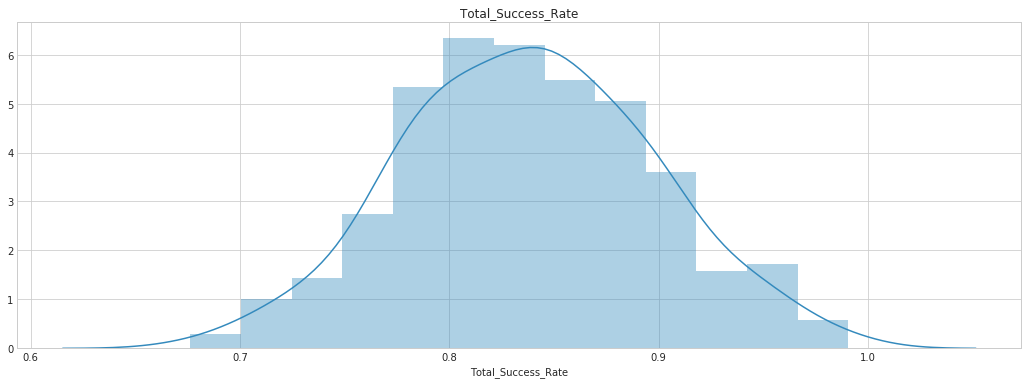

In [26]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18, 6))
sns.distplot(team_df.Total_Success_Rate, color='#348ABD')
plt.xlabel("Total_Success_Rate")
plt.title('Total_Success_Rate');

First we make a correlation list for all features in the orignal datasets and create plots for transofredm features with the least squares regression fitted line and the hexagon-aggregated 2D histograms as an example to illustrate the trends

In [27]:
# check how the features are correlated with the overall ratings

for f in features:
    related = team_df['playoffs'].corr(team_df[f])
    print("%s: %f" % (f, related))

Pass_O_Total_EPA: 0.492673
Run_O_Win_Success_Rate: 0.508381
Pass_O_Clutch_EPA_per_Drive: 0.482650
Total_Success_Rate: 0.418072
Pass_D_Win_Success_Rate: -0.375344
Total_EPA: 0.518058
Pass_O_Interceptions: -0.470359
Pass_O_Success_Rate: 0.419638
third_down_conv_rate1: 0.182646
fourth_down_conv_rate: -0.393054


/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


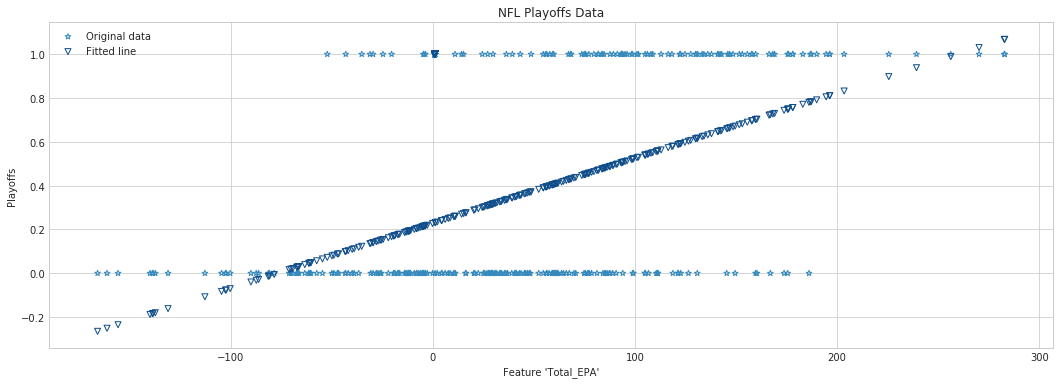

In [28]:
plt.figure(figsize=(18, 6))
x, y = features['Total_EPA'], playoffs
x1 = np.array([[v,1] for v in x])
y1 = np.array([[v,1] for v in y])
(slope,bias),_,_,_ = np.linalg.lstsq(x1,y1)
y_lin = x1 * slope + bias
plt.scatter(x1, y1, color='#348ABD', marker='*', facecolors='none', label='Original data')
plt.scatter(x1, y_lin, color='#104E8B', marker='v', facecolors='none', label='Fitted line')
plt.xlabel("Feature 'Total_EPA'")
plt.ylabel("Playoffs")
plt.title('NFL Playoffs Data')
plt.legend();

### Feature Correlation Analysis

__Expected Points Added (EPA)__ estimates a play’s value based on
the change in situation, providing a point value
EPAplayi = EPplayi+1 − EPplayi

http://www.stat.cmu.edu/~ryurko/pdf/greatlakes_2017.pdf


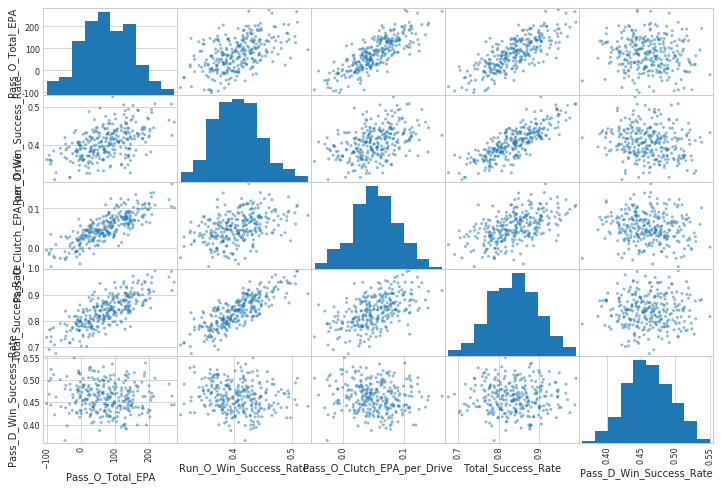

In [29]:
#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Ease_of_Business.ipynb
from pandas.plotting import scatter_matrix

attributes = ['Pass_O_Total_EPA',
 'Run_O_Win_Success_Rate',
 'Pass_O_Clutch_EPA_per_Drive',
 'Total_Success_Rate',
 'Pass_D_Win_Success_Rate']

scatter_matrix(team_df[attributes], figsize=(12, 8))
#plt.savefig("scatter_matrix_plot.png")
plt.show()

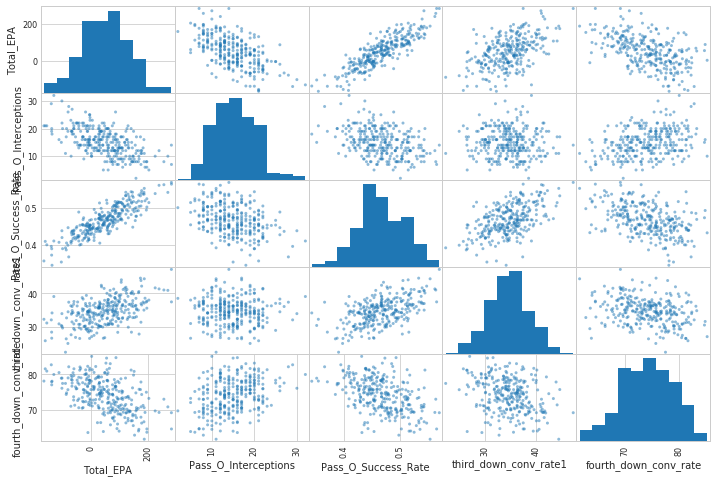

In [30]:
attributes = ['Total_EPA',
 'Pass_O_Interceptions',
 'Pass_O_Success_Rate',
 'third_down_conv_rate1',
 'fourth_down_conv_rate']

scatter_matrix(team_df[attributes], figsize=(12, 8))
#plt.savefig("scatter_matrix_plot.png")
plt.show()

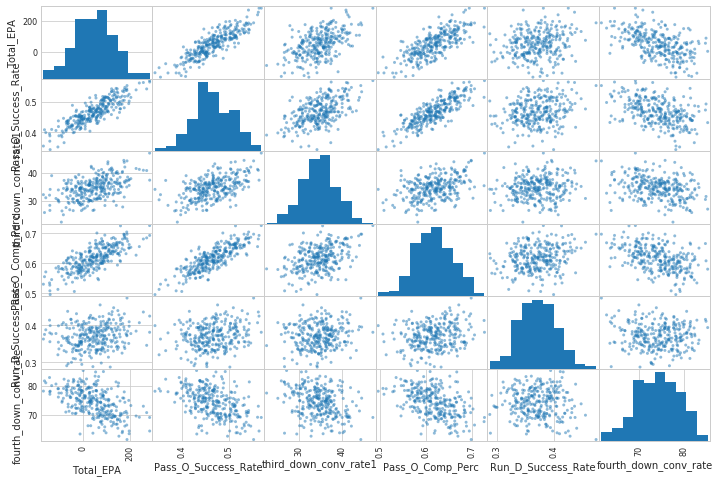

In [31]:
attributes = ['Total_EPA',
              'Pass_O_Success_Rate',
              'third_down_conv_rate1',
              'Pass_O_Comp_Perc',
              'Run_D_Success_Rate',
 'fourth_down_conv_rate']

scatter_matrix(team_df[attributes], figsize=(12, 8))
#plt.savefig("scatter_matrix_plot.png")
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(features, playoffs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print('Estimated intercept coefficient:', regressor.intercept_)


Estimated intercept coefficient: 1.0227862736025213


In [34]:
print('Number of coefficients:', len(regressor.coef_))

Number of coefficients: 10


In [35]:
pd.DataFrame(list(zip(features, regressor.coef_)), columns = ['features', 'est_coef'])

,features,est_coef
0,Pass_O_Total_EPA,-0.001888
1,Run_O_Win_Success_Rate,7.332699
2,Pass_O_Clutch_EPA_per_Drive,2.089613
3,Total_Success_Rate,-5.833530
4,Pass_D_Win_Success_Rate,-3.059305
5,Total_EPA,0.001425
6,Pass_O_Interceptions,-0.014010
7,Pass_O_Success_Rate,6.741894
8,third_down_conv_rate1,0.001863
9,fourth_down_conv_rate,-0.005057


The most promising attribute to predict the team going to the playoffs is 'Run_O_Win_Success_Rate', so lets zoom in on their correlation scatterplot.

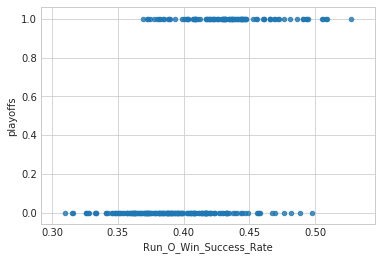

In [36]:
team_df.plot(kind="scatter", x="Run_O_Win_Success_Rate", y="playoffs",alpha=0.8)
#plt.savefig('scatter_plot.png')

not very exclting

# Playoff Team Classifiers and ML Models

After our analysis we finally get to the fun part. Just a quick refresher our objective for this project is to __Predict whether a team is playoff bound__


## k-Nearest Neighbors

Lets initiate our ML algorithm with KNN since its one of the easiest. To make a prediciton for a new data point, the KNN algorithm finds the closest data points in the training dataset; hence the nearest neighbor.

In [37]:
# split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, playoffs, stratify=playoffs, random_state=66)
#X_train, X_test, y_train, y_test = train_test_split(features, playoffs, test_size=0.2, random_state=1)

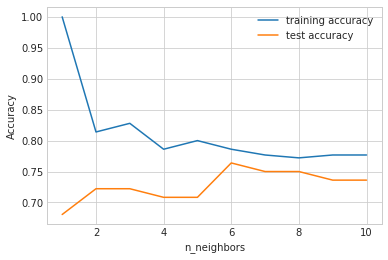

In [38]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

This plot shows the training and test sets accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neghbors are considered, the training accuracy drops, indicating that use of a single nearest neighbor leads to a model that is too complex.

The best performance is somewhere around three neighbors. Still, its good to keep the scale of the plot in mind. It is noteworthy to mention that the worst performance is less than 70%.. which is not preferrable.

The above plot suggest that we should choose n_neighbors=3. Here we are:

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.72


## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.791
Test set score: 0.778


In [41]:
logreg100 = LogisticRegression(C=900).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.823
Test set score: 0.847


In [42]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.800
Test set score: 0.764


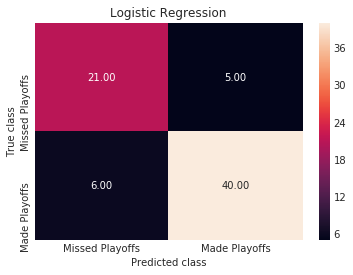

In [43]:
logreg_y_pred = logreg100.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Missed Playoffs", "Made Playoffs"] , yticklabels = ["Missed Playoffs", "Made Playoffs"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.778


In [45]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.921
Accuracy on test set: 0.819


## Feature Importance

In [46]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.36354802 0.08211797 0.         0.14656425 0.02316116
 0.17004398 0.         0.11355638 0.10100825]


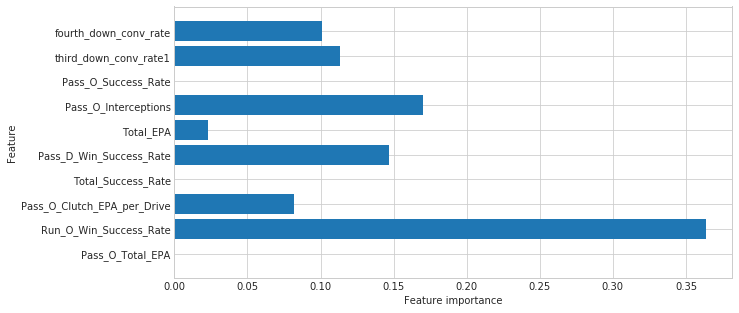

In [47]:
def plot_feature_importances_playoffs(model):
    plt.figure(figsize=(10,5))
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_playoffs(tree)

Feature 'Total_Success_Rate' is by far the most important feature

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.778


Random forst gives us 84.7% accuracy, this is better than a single decision tree, without tuning the parameters. 

#### Feature importance in Random Forest

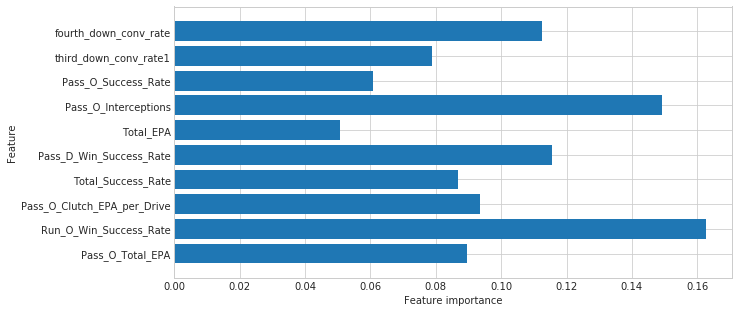

In [49]:
plot_feature_importances_playoffs(rf)

In [50]:
feature_labels = features.columns.values
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
pd.DataFrame([(feature_labels[index],round((importance[index]*100),3)) for index in feature_indexes_by_importance]).sort_values(by=[1],ascending=False)

,0,1
9,Run_O_Win_Success_Rate,16.258
8,Pass_O_Interceptions,14.916
7,Pass_D_Win_Success_Rate,11.551
6,fourth_down_conv_rate,11.252
5,Pass_O_Clutch_EPA_per_Drive,9.361
4,Pass_O_Total_EPA,8.942
3,Total_Success_Rate,8.675
2,third_down_conv_rate1,7.889
1,Pass_O_Success_Rate,6.074
0,Total_EPA,5.081


#### Precision and Recall 

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.82      0.82      0.82        45
          1       0.70      0.70      0.70        27

avg / total       0.78      0.78      0.78        72



Text(0.5,1,'Random Forest')

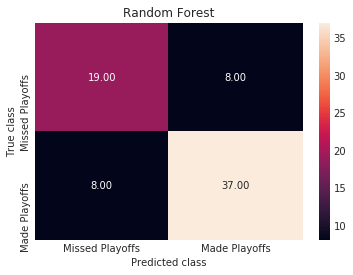

In [52]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns

forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Missed Playoffs", "Made Playoffs"] , yticklabels = ["Missed Playoffs", "Made Playoffs"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
#plt.savefig('random_forest')

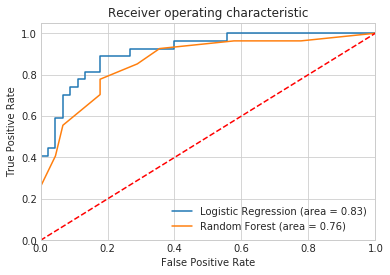

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg100.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg100.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.819


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [55]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.916
Accuracy on test set: 0.889


In [56]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.926
Accuracy on test set: 0.806


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

Still, we can visualize the feature importances to get more insight into our model even though we are not really happy with the mode

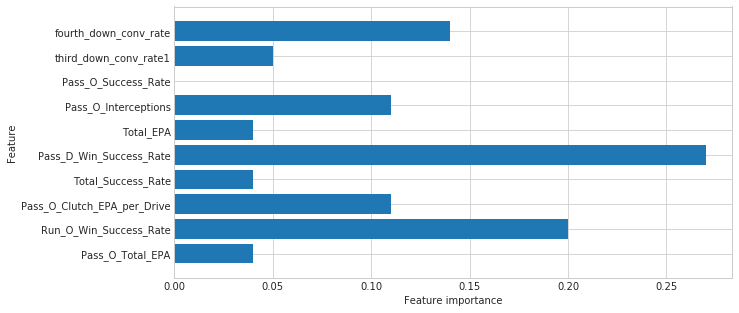

In [57]:
gb = GradientBoostingClassifier(random_state=0, max_depth=1)
gb.fit(X_train, y_train)

plot_feature_importances_playoffs(gb1)

We can see some significant differences in the feature importance of the gradient boosted trees are somewhat different to the feature importance random forests, this could be evident that _gradient boosting completely ignored some of the features_.

In [58]:
feature_labels = features.columns.values
importance = gb.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Pass_O_Success_Rate-0.00%
Pass_O_Total_EPA-4.00%
Total_Success_Rate-4.00%
Total_EPA-4.00%
third_down_conv_rate1-5.00%
Pass_O_Clutch_EPA_per_Drive-11.00%
Pass_O_Interceptions-11.00%
fourth_down_conv_rate-14.00%
Run_O_Win_Success_Rate-20.00%
Pass_D_Win_Success_Rate-27.00%


### Support Vector Machine

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.62


We again are seeing a 100% accuracy on the training set indicating substantal overfitting, with a perfect score on the training set and a 67% accuracy on the test set. 

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.82
Accuracy on test set: 0.82


scaling the data made a huge difference! we are actually in an underfitting regime, where training and test data are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model

In [61]:
svc = SVC(C=75)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.856
Accuracy on test set: 0.833


Wel, increasing C didnt improve the model all that much.

### Neural Networks

In [62]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.61
Accuracy on test set: 0.56


This is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [63]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.806


The results have significantely improved after scalling, test accuracy 87.5%

In [64]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.609
Accuracy on test set: 0.583


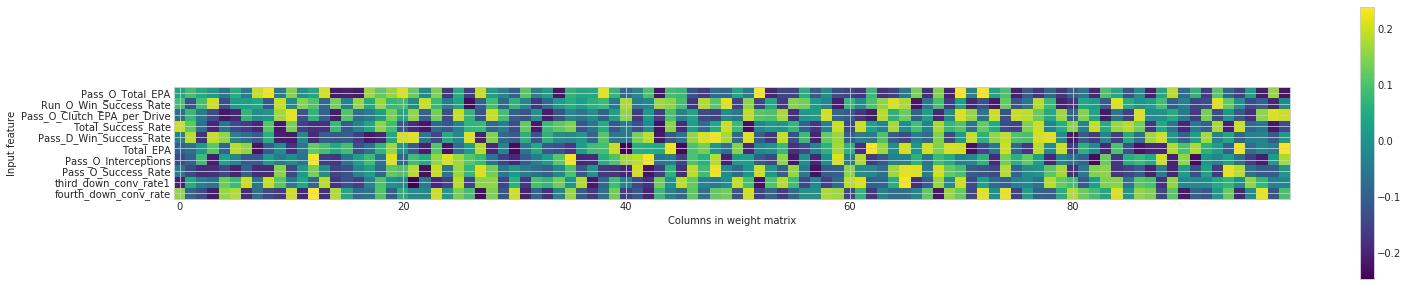

In [65]:
plt.figure(figsize=(25, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
#plt.yticks(range(65), features)
plt.yticks(range(10), features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

The above plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 65 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative values.

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.

### Resources

Here is a list of resources that I found helpful when writing up this post:

__General__
* [NFL Stats Reference](https://www.pro-football-reference.com/teams/dal/2017.htm)

__Feature Engineering__
* [Model Interpretability](https://github.com/savvastj/model_interpretability_post/blob/master/03_Model_Interpretability_Blog_Post.ipynb)
* [Random Forest Intepretation with Scikit Learn](http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/)


__Model Implementation and Anlysis__
* [Sklearn Metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Brest Cancer Prediction](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/breast_cancer_predict.ipynb)